MADE Advanced ML - HW1 - Михаил Гуревич

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

1) Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

<font color='blue'>Обозначим:
    
Событие A - подсудимый не виновен

Событие B - подсудимый имеет редкую группу крови, которую нашли на месте преступления

Прокурор говорит следующее:

$P(B|A) = 1\%$

а после этого делает переход:

$P(\bar{A}) = 99\%$

То есть он считает, что события:
- Невиновный человек имеет редкую группу крови (тут можно считать, что $P(AB) \approx A(B|A$), т.к. $P(B|A) = \frac{P(AB)}{P(A)}$, а у нас невиновны $999,999$ человек из $1,000,000$) - Событие $B|A$
- Человек виновен - Событие $\bar{A}$

в сумме дают вероятность 1, но это не так.

Покажем это строго. Прокурор утверждает, что:

$1 = P(B|A) + P(\bar{A})$

$P(B|A) + P(\bar{A}) = 1 - P(A) + \frac{P(BA)}{P(A)} = 1 - 0.999999 + \frac{0.009999}{0.999999} = 0.01 \neq 1$

Прокурор неправильно переводит вероятность отсутствие редкой группы крови у большинства людей в по сути утверждение, что все обладатели редкой группы крови - убийцы.

Прокурор должен был рассчитать следующую вероятность (тут я предполагаю, что подсудимый - это случайный человек с улицы и других улик против него нет, случай, когда другие улики есть - покажу в задании 2):

$P(\bar{A}|B) = \frac{P(\bar{A}B)}{P(B)} = \frac{1}{10000} = 0.01\%$

</font>


2) Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.


<font color='blue'>Адвокат рассуждает правильно, если предположить, что подсудимый - это случайный человек с улицы и других улик против него нет.

Правильное рассуждение в этой ситуаций:

Наличие у подсудимого редкой группы крови приведет к повышению апостериорной вероятности (если других улик не было, то от вероятности 1 к 1,000,000, если улики уже были, то от текущего уровня), а не должно быть истрактовано просто как 0.01%</font>

<font color='blue'>$P(C)$ - априорная вероятность, что подсудимый виновен

Событие $B$ - подсудимый имеет редкую группу крови, которую нашли на месте преступления

Тогда $P(C|B) = \frac{P(B|C)P(C)}{P(B)}$
    
</font>

3) Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
p_coronavirus = 0.01
fp = 0.05
fn = 0.05

In [76]:
def positive_test(p_coronavirus, fp, fn):
    p_B = (1 - p_coronavirus) * fp + p_coronavirus * (1 - fn)
    p_B_A = 1 - fn
    return p_B_A * p_coronavirus / p_B

def negative_test(p_coronavirus, fp, fn):
    p_notB = (1 - p_coronavirus) * (1 - fp) + p_coronavirus * fn
    p_notB_A = fn
    return p_notB_A * p_coronavirus / p_notB

In [77]:
# sanity check
positive_test(p_coronavirus, fp, fn)

0.16101694915254236

In [78]:
fp_space = np.linspace(0.05, 0.001, 50)
fn_space = np.linspace(0.05, 0.001, 50)

probs_positive_fp_space = positive_test(p_coronavirus, fp_space, fn)
probs_positive_fn_space = positive_test(p_coronavirus, fp, fn_space)
probs_negative_fp_space = negative_test(p_coronavirus, fp_space, fn)
probs_negative_fn_space = negative_test(p_coronavirus, fp, fn_space)

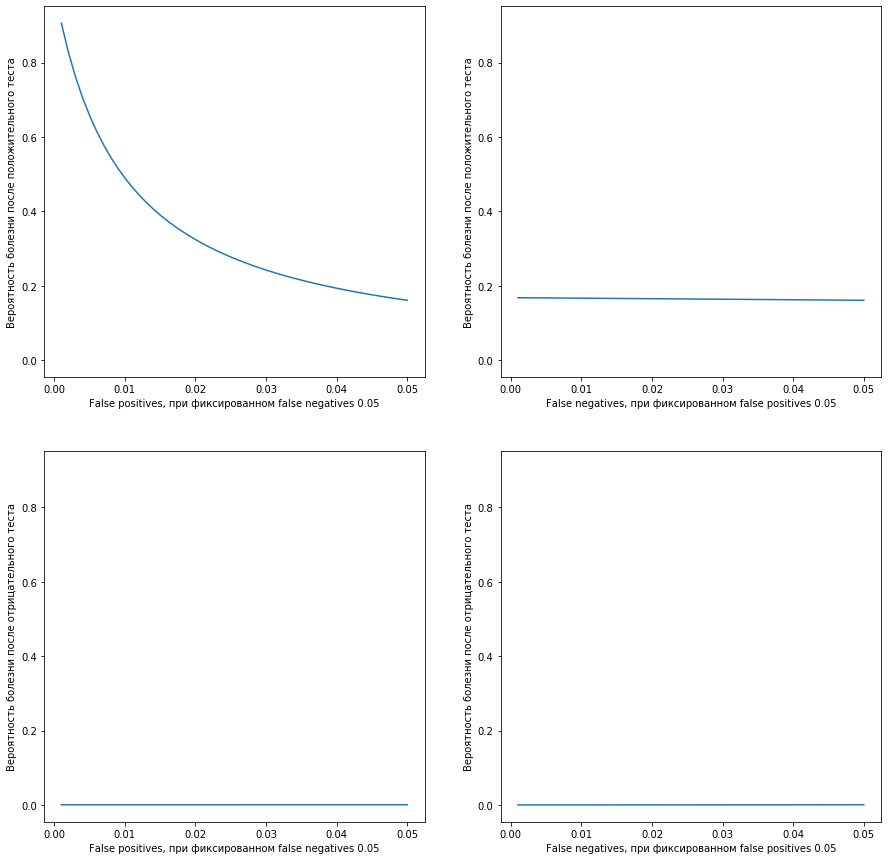

In [91]:
plt.subplots(2, 2, figsize=(15,15))
ax1=plt.subplot(2, 2, 1)
ax1.plot(fp_space, probs_positive_fp_space)
ax1.set_xlabel('False positives, при фиксированном false negatives 0.05')
ax1.set_ylabel('Вероятность болезни после положительного теста')

ax2=plt.subplot(2, 2, 2, sharey=ax1)
ax2.plot(fn_space, probs_positive_fn_space)
ax2.set_xlabel('False negatives, при фиксированном false positives 0.05')
ax2.set_ylabel('Вероятность болезни после положительного теста')

ax3=plt.subplot(2, 2, 3, sharey=ax1)
ax3.plot(fp_space, probs_negative_fp_space)
ax3.set_xlabel('False positives, при фиксированном false negatives 0.05')
ax3.set_ylabel('Вероятность болезни после отрицательного теста')

ax4=plt.subplot(2, 2, 4, sharey=ax3)
ax4.plot(fn_space, probs_negative_fn_space)
ax4.set_xlabel('False negatives, при фиксированном false positives 0.05')
ax4.set_ylabel('Вероятность болезни после отрицательного теста')

plt.show()

<font color='blue'>
1) На двух левых графиках видим, что уменьшение false positives приводит к:
    
- Резкому возрастанию вероятности болезни после получения *положительного* результата теста при уменьшении false positives

- Незначительному возрастанию вероятности болезни после получения *отрицательного* результата теста при уменьшении false positives - даже при изначальных уровнях ошибка была незначительная - 0.0005

2) На двух правых графиках видим, что уменьшение false negatives приводит к:
    
- Незначительному уменьшению вероятности болезни после получения *положительного* результата теста при уменьшении false negatives

- Незначительному уменьшению вероятности болезни после получения *отрицательного* результата теста при уменьшении false negatives - даже при изначальных уровнях ошибка была незначительная - 0.0005

Сосредоточиться лучше на уменьшении false positive - это позволит резко улучшить качество диагностирования.

При этом стоит учесть, что оставив false negatives на уровне 0.05 - мы будем пропускать порядка 1 больного человека на каждый 2000 тестов. Если это критичнее для системы здравоохранения, чем множество ложноположительных больных - 99 человек на 2000 тестов (не учитываю возможное повторное тестирование), то стоит поступить наоборот.

Финальный вывод: Рекомендуем уменьшать false positive.

</font>